# Effect of Weight Initialisation on MLP Training Stability (MNIST)
### Machine Learning & Neural Networks – Individual Assignment



In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers, Input
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise and flatten
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

print("Training set:", x_train.shape)
print("Test set:", x_test.shape)


Training set: (60000, 784)
Test set: (10000, 784)


In [10]:
def build_mlp(initialiser):
    inputs = Input(shape=(784,))

    x = layers.Dense(256, activation="relu",
                     kernel_initializer=initialiser)(inputs)
    x = layers.Dense(256, activation="relu",
                     kernel_initializer=initialiser)(x)
    x = layers.Dense(128, activation="relu",
                     kernel_initializer=initialiser)(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


## Build Three MLP Models with Different Weight Initialisations
- Random Normal  
- Xavier (Glorot Normal)  
- He Normal  


In [11]:
init_random = initializers.RandomNormal(mean=0.0, stddev=0.05)
init_xavier = initializers.GlorotNormal()
init_he = initializers.HeNormal()

model_random = build_mlp(init_random)
model_xavier = build_mlp(init_xavier)
model_he = build_mlp(init_he)


## Train All Three Models for Comparison
Each model is trained for 5 epochs to highlight differences clearly.


In [12]:
history_random = model_random.fit(x_train, y_train,
                                  validation_data=(x_test, y_test),
                                  epochs=5, batch_size=128, verbose=1)

history_xavier = model_xavier.fit(x_train, y_train,
                                  validation_data=(x_test, y_test),
                                  epochs=5, batch_size=128, verbose=1)

history_he = model_he.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=5, batch_size=128, verbose=1)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9189 - loss: 0.2764 - val_accuracy: 0.9614 - val_loss: 0.1235
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9699 - loss: 0.0975 - val_accuracy: 0.9696 - val_loss: 0.0950
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9796 - loss: 0.0651 - val_accuracy: 0.9757 - val_loss: 0.0772
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9777 - val_loss: 0.0756
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9799 - val_loss: 0.0673
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9234 - loss: 0.2584 - val_accuracy: 0.9615 - val_loss: 0.1238
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9700 - loss: 0.0958 - val_accuracy: 0.9702 - val_loss: 0.0994
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9800 - loss: 0.0620 - val_accur

## Validation Accuracy Comparison
This plot shows how weight initialisation affects learning ability.


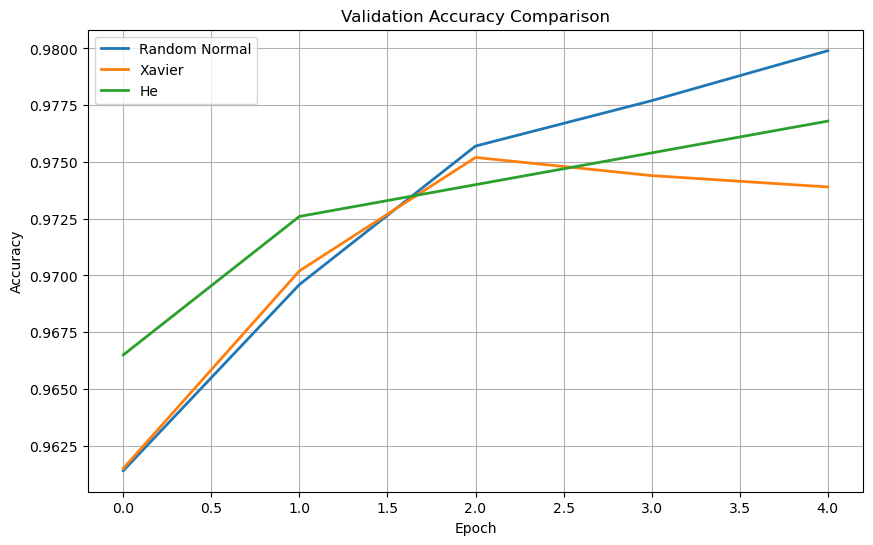

In [13]:
plt.figure(figsize=(10,6))

plt.plot(history_random.history["val_accuracy"], label="Random Normal", linewidth=2)
plt.plot(history_xavier.history["val_accuracy"], label="Xavier", linewidth=2)
plt.plot(history_he.history["val_accuracy"], label="He", linewidth=2)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.savefig("initialisation_accuracy_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


## Training Loss Comparison
We expect Random Normal to show instability, Xavier to be moderate, and He to be most stable.


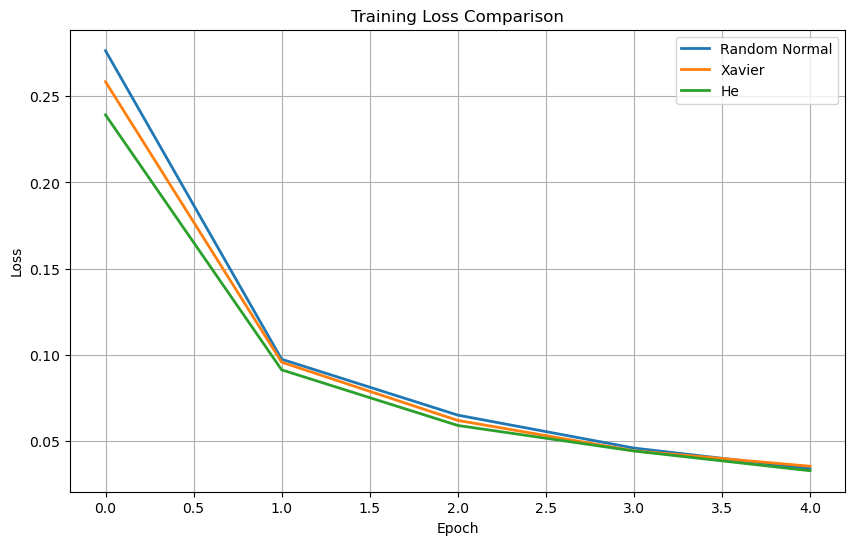

In [14]:
plt.figure(figsize=(10,6))

plt.plot(history_random.history["loss"], label="Random Normal", linewidth=2)
plt.plot(history_xavier.history["loss"], label="Xavier", linewidth=2)
plt.plot(history_he.history["loss"], label="He", linewidth=2)

plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.savefig("initialisation_loss_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


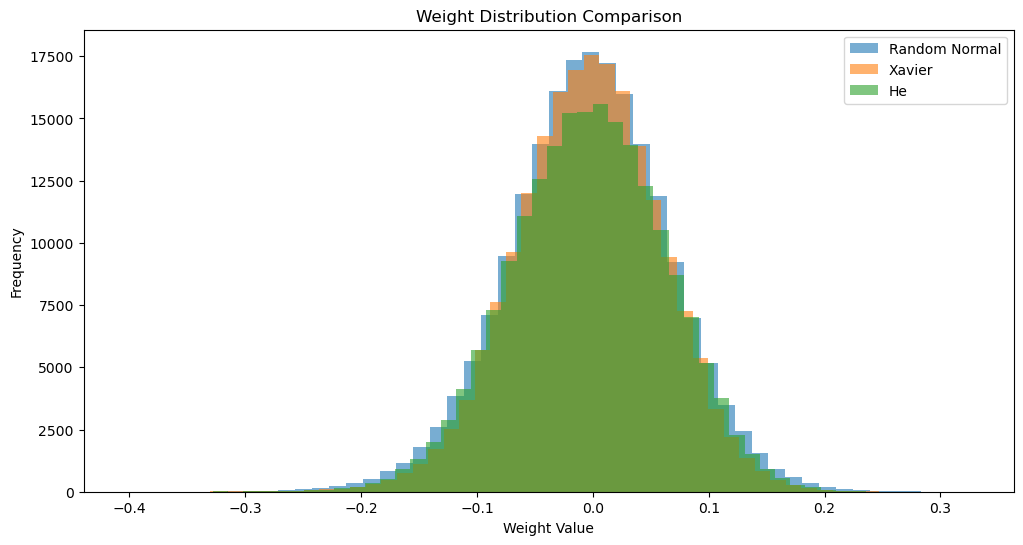

In [15]:
weights_random = model_random.layers[1].get_weights()[0].flatten()
weights_xavier = model_xavier.layers[1].get_weights()[0].flatten()
weights_he = model_he.layers[1].get_weights()[0].flatten()

plt.figure(figsize=(12,6))
plt.hist(weights_random, bins=50, alpha=0.6, label="Random Normal")
plt.hist(weights_xavier, bins=50, alpha=0.6, label="Xavier")
plt.hist(weights_he, bins=50, alpha=0.6, label="He")

plt.legend()
plt.title("Weight Distribution Comparison")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

plt.savefig("initialisation_weight_histograms.png", dpi=300, bbox_inches='tight')
plt.show()